In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from config import username, password, host, port

In [11]:
# create an engine that can connect to local database
engine = create_engine(f"postgresql://{username}:{password}@{host}:{port}/postgres")
conn=engine.connect()

In [12]:
##read in salaries and their count from sql
salary_count = pd.read_sql('SELECT salary, COUNT(salary) FROM salaries group by salary order by salary;',conn)

In [13]:
#Create salary count database
count_df = pd.DataFrame(salary_count, columns=['salary','count'])
count_df = count_df.dropna()

In [14]:
# Calculate Min & Max Salaries
min_salary = (count_df["salary"].min())
max_salary = (count_df["salary"].max())

# Show values for min and max salaries
min_salary, max_salary

(40000, 129492)

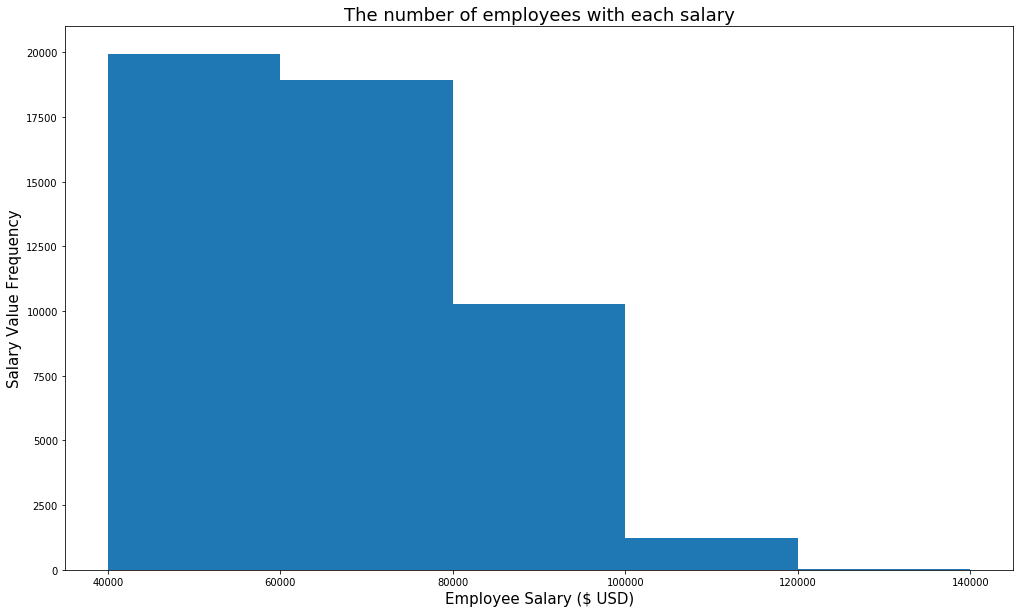

In [15]:
# Create the Histogram Chart
bins = 40000,60000,80000,100000,120000,140000
fig=plt.figure(figsize=(17,10))
plt.hist(count_df['salary'],bins)
plt.xlabel("Employee Salary ($ USD)", fontsize=15)
plt.ylabel("Salary Value Frequency",fontsize=15)
plt.ylim(0, 21000)
plt.title("The number of employees with each salary", fontsize=18)
plt.show()

In [16]:
#read in emp_no and emp_title_id from sql
employee = pd.read_sql('select emp_no,emp_title_id from employees group by emp_no order by emp_no',conn)

In [17]:
#read in emp_title_id and job title from sql
job_title = pd.read_sql('select emp_title_id,title from titles group by emp_title_id order by emp_title_id',conn)

In [20]:
#merge employees and titles
merge_titles = pd.merge(employee, job_title, how='inner', on='emp_title_id')
merge_titles = merge_titles.dropna()

In [21]:
#read in emp_no and salaries from sql
salaries = pd.read_sql('select emp_no, salary from salaries group by emp_no order by emp_no',conn)

In [22]:
#merge merge_titles and salaries
merge_salaries = pd.merge(merge_titles, salaries, how='inner', on='emp_no')

In [23]:
#Create job salary database
jobsalaries_df = pd.DataFrame(merge_salaries, columns=['title','salary'])
jobsalaries_df = jobsalaries_df.dropna()

In [24]:
#Create database with average salaries grouped by job title for plotting
plotting_values = jobsalaries_df.groupby(['title'])['salary'].mean()
plotting_values = plotting_values.dropna()
plotting_values

title
Assistant Engineer    48564.434447
Engineer              48535.336511
Manager               51531.041667
Senior Engineer       48506.799871
Senior Staff          58550.172704
Staff                 58465.382850
Technique Leader      48582.896092
Name: salary, dtype: float64

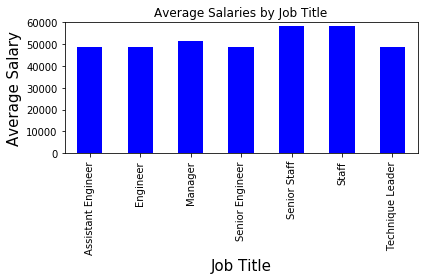

In [25]:
plotting_values.plot(x="title", y='salary', kind='bar', color = 'blue')
plt.xlabel("Job Title", fontsize=15)
plt.ylabel("Average Salary",fontsize=15)
plt.title("Average Salaries by Job Title")
plt.ylim(0, 60000)
plt.tight_layout()
plt.show()

In [26]:
#search employee ID Number 499942
mysalary = pd.read_sql('select * from salaries where emp_no = 499942',conn)
mysalary

,emp_no,salary
0,499942,40000


In [27]:
#close the connection
conn.close()